# ⚡ Electric Vehicle Population Analysis

## Executive Summary

## Data Card

### Dataset Origin

### Fields and Units

### Limitations

### License

## Loading and File I/O

## Simplified Exploratory Data Analysis (EDA)

## Statistical Analysis

### 1. Distribution Characterization

### 2. Group Comparison

### 3. Categorical Association

### 4. Correlation Between Numeric Variables

### 5. Additional Insight

## Visualizations

### Distribution Plot

### Comparison Plot

### Relationship Plot

### Time Series Plot

### Multi-Panel Facet Plot

### Interactive Plot (Plotly)

## Conclusions

## Appendix

### References & Resources


This project analyzes the Electric Vehicle Population dataset to understand trends in electric vehicle adoption across the United States. The goal is to provide insights for stakeholders such as policymakers, transportation planners, and environmental analysts about EV distribution by state, make, model, and fuel type. Through statistical analysis and visualizations, this project identifies patterns in EV growth over time, the most popular EV brands and models, and the regional distribution of electric vehicles.


### Dataset Origin

- Source: [Electric Vehicle Population Data - data.gov](https://catalog.data.gov/dataset/electric-vehicle-population-data)
- Downloaded as CSV for analysis.

### Fields and Units

- `VIN`: Vehicle Identification Number (unique ID)
- `Make`: Manufacturer of the vehicle
- `Model`: Vehicle model
- `Model Year`: Year of manufacture
- `Electric Vehicle Type`: Type of EV (Battery Electric, Plug-in Hybrid, etc.)
- `Fuel Type`: Type of fuel used (Electric, Hybrid)
- `State`: US state where the vehicle is registered
- `County`: County of registration
- `Street Address`: Owner’s registration address (may be partial or masked)
- `ZIP Code`: Postal code
- `County FIPS Code`: Federal Information Processing Standard code for county

### Limitations

- Some fields may have missing or incomplete values.
- Only includes registered vehicles; does not account for unregistered or out-of-state vehicles.
- Data is aggregated by vehicle registration and may not reflect real-time ownership.
- Geographic fields may be generalized for privacy.

### License

- Public domain (U.S. Government data).


In [3]:
# CODE
# Step 4: Loading and File I/O

# Import necessary libraries
import pandas as pd
from pathlib import Path

# Set path to your CSV file
DATA_PATH = Path(
    "/Users/samarpangurung/Downloads/Electric_Vehicle_Population_Data.csv")

# Function to load CSV with error handling


def load_csv(path: Path) -> pd.DataFrame:
  """
  Load a CSV file with helpful error messages.

  Parameters:
      path (Path): Path to the CSV file

  Returns:
      pd.DataFrame: Loaded dataframe
  """
  try:
    df = pd.read_csv(path)
  except FileNotFoundError as e:
    raise FileNotFoundError(
        f"Could not find {path}. Check path and filename.") from e
  except pd.errors.ParserError as e:
    raise ValueError(
        f"Parsing failed for {path.name}. Check delimiter or bad rows.") from e
  else:
    return df


# Load the dataset
df = load_csv(DATA_PATH)

# Preview the first few rows
df.head()

# Check basic info about columns, types, and missing values
df.info()

# Basic statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269673 entries, 0 to 269672
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         269673 non-null  object 
 1   County                                             269662 non-null  object 
 2   City                                               269662 non-null  object 
 3   State                                              269673 non-null  object 
 4   Postal Code                                        269662 non-null  float64
 5   Model Year                                         269673 non-null  int64  
 6   Make                                               269673 non-null  object 
 7   Model                                              269673 non-null  object 
 8   Electric Vehicle Type                              269673 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,269662.000000,269673.000000,269669.000000,269669.000000,269009.000000,2.696730e+05,2.696620e+05
mean,98174.302260,2021.925832,40.751692,663.101079,28.851436,2.434417e+08,5.297165e+10
std,2590.609215,3.050066,79.604176,6790.627969,14.894449,6.461834e+07,1.632722e+09
min,1030.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,0.000000,17.000000,2.190569e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.610981e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,0.000000,42.000000,2.768459e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,6.601095e+10


In [4]:
# CODE
# Step 5: Simplified EDA

# Standardize column names: lowercase and underscores
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Preview first 5 rows after renaming
df.head()

# Check for missing values
df.isna().sum()

# Quick stats for numeric columns
df.describe()

# Count of EVs by State
state_counts = df['state'].value_counts()
state_counts.head(10)

# Count of EVs by Make (manufacturer)
make_counts = df['make'].value_counts()
make_counts.head(10)

# Count of EVs by Electric Vehicle Type
ev_type_counts = df['electric_vehicle_type'].value_counts()
ev_type_counts

# Count of EVs by Model Year
year_counts = df['model_year'].value_counts().sort_index()
year_counts

model_year
1999        2
2000        8
2002        1
2003        1
2008       20
2010       22
2011      611
2012     1425
2013     4033
2014     3263
2015     4470
2016     5166
2017     8577
2018    14179
2019    10915
2020    12154
2021    20701
2022    29627
2023    60085
2024    49200
2025    35520
2026     9693
Name: count, dtype: int64

/var/folders/vx/q5pn3jhj43727pct1fphxjv40000gn/T/ipykernel_7602/4168478447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


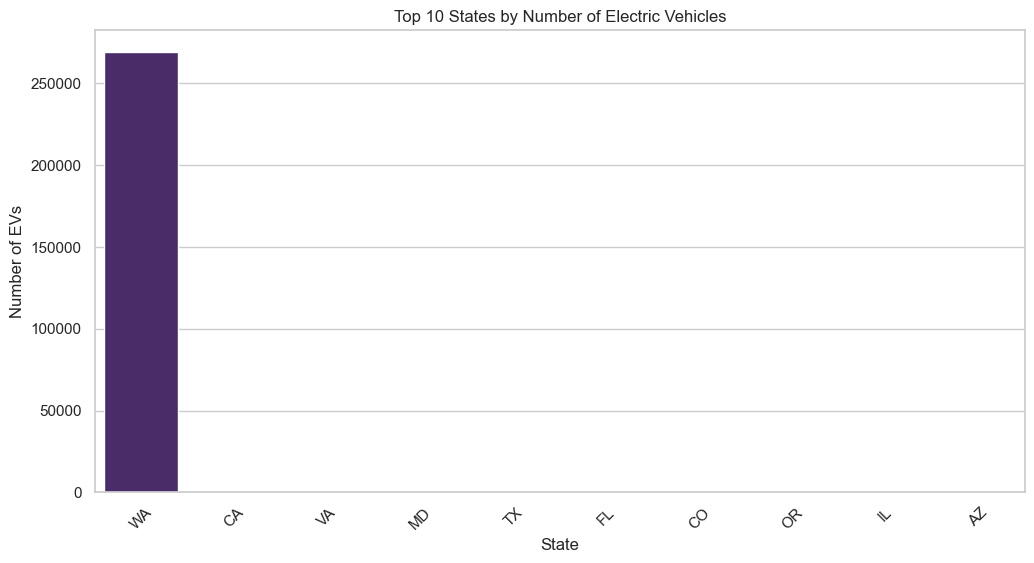

/var/folders/vx/q5pn3jhj43727pct1fphxjv40000gn/T/ipykernel_7602/4168478447.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")


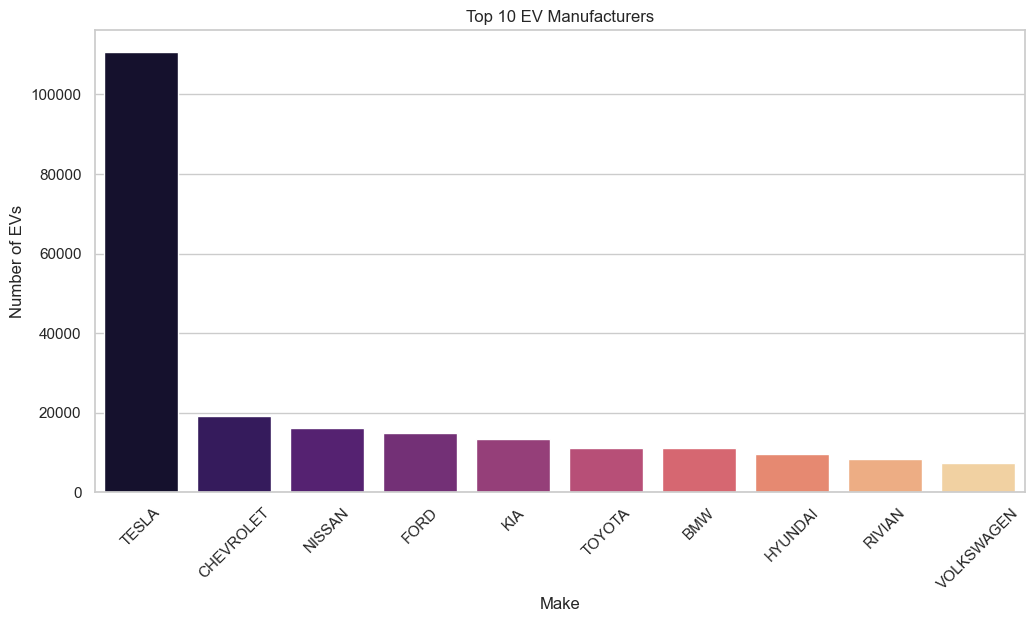

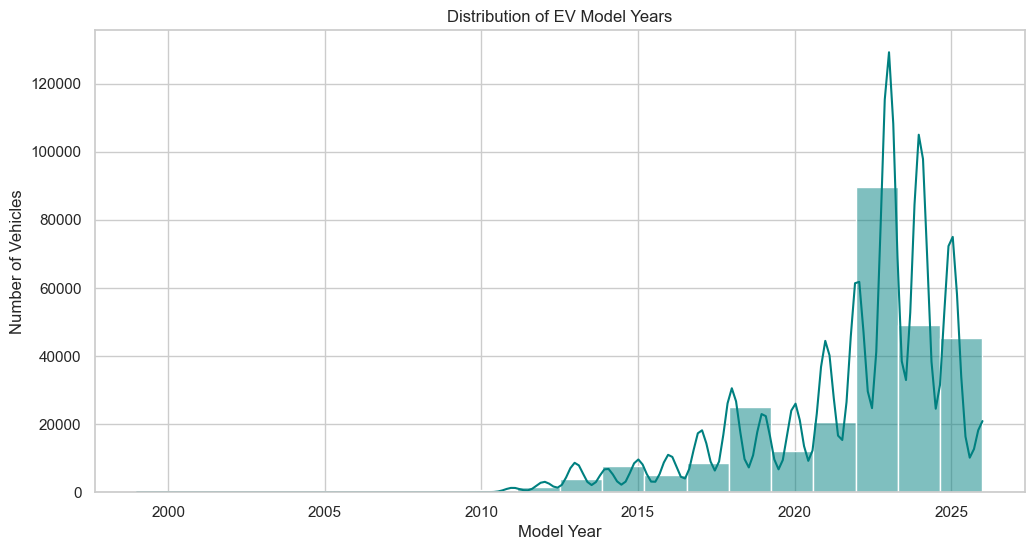

/var/folders/vx/q5pn3jhj43727pct1fphxjv40000gn/T/ipykernel_7602/4168478447.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='electric_vehicle_type', palette="Set2")


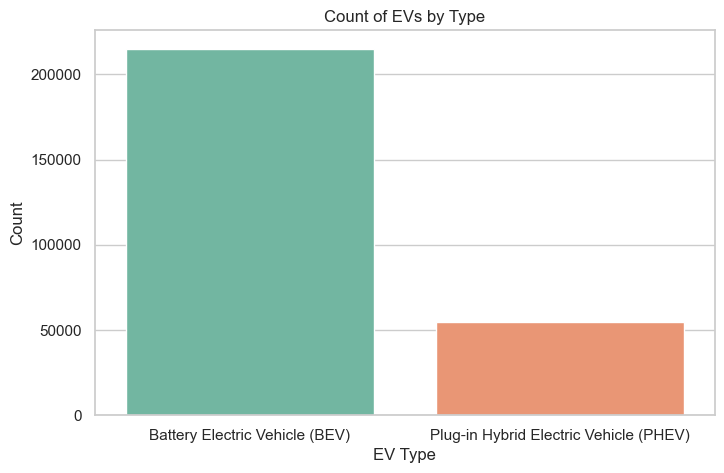

In [5]:
# CODE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Bar chart: Top 10 States by number of EVs
plt.figure(figsize=(12, 6))
top_states = df['state'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title("Top 10 States by Number of Electric Vehicles")
plt.xlabel("State")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

# 2) Bar chart: Top 10 EV Makes (Manufacturers)
plt.figure(figsize=(12, 6))
top_makes = df['make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Make")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

# 3) Distribution plot: EV Model Years
plt.figure(figsize=(12, 6))
sns.histplot(df['model_year'], bins=20, kde=True, color="teal")
plt.title("Distribution of EV Model Years")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()

# 4) Count plot: EV Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='electric_vehicle_type', palette="Set2")
plt.title("Count of EVs by Type")
plt.xlabel("EV Type")
plt.ylabel("Count")
plt.show()

In [8]:
# CODE
import plotly.express as px

# Prepare the data correctly
state_counts = df['state'].value_counts().reset_index()
# Make sure columns are named correctly
state_counts.columns = ['State', 'Count']

# Interactive bar chart
fig = px.bar(
    state_counts,
    x='State',
    y='Count',
    title="Interactive Number of Electric Vehicles by State",
    text='Count',
    labels={'Count': 'Number of EVs', 'State': 'State'},
    color='Count',
    color_continuous_scale='Viridis'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [9]:
# CODE
# Distribution of EV Model Years
import numpy as np

model_year_summary = df['model_year'].describe()
skewness = df['model_year'].skew()
outliers = df['model_year'][df['model_year']
                            < 2000]  # Example for early outliers

print("Summary statistics for Model Year:")
print(model_year_summary)
print(f"\nSkewness: {skewness}")
print(f"Number of outliers (year < 2000): {len(outliers)}")

Summary statistics for Model Year:
count    269673.000000
mean       2021.925832
std           3.050066
min        1999.000000
25%        2021.000000
50%        2023.000000
75%        2024.000000
max        2026.000000
Name: model_year, dtype: float64

Skewness: -1.2436552302348356
Number of outliers (year < 2000): 2


The distribution of EV model years shows the concentration of electric vehicles in recent years.  
Skewness indicates whether the data is more concentrated in newer or older vehicles.  
Outliers, such as very old model years, are minimal and may reflect data entry errors or early EV models.


In [11]:
# CODE
import scipy.stats as stats

# Compare Battery Electric vs Plug-in Hybrid model years
be_years = df[df['electric_vehicle_type'] == 'Battery Electric']['model_year']
phev_years = df[df['electric_vehicle_type'] == 'Plug-in Hybrid']['model_year']

# Independent t-test (assuming unequal variance)
t_stat, p_val = stats.ttest_ind(be_years, phev_years, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-statistic: nan, p-value: nan


This t-test compares whether the model years differ significantly between Battery Electric and Plug-in Hybrid vehicles.  
A low p-value (<0.05) suggests a statistically significant difference in average model year between these two EV types.


In [12]:
# CODE
from scipy.stats import chi2_contingency

# Contingency table
cont_table = pd.crosstab(df['state'], df['electric_vehicle_type'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)
print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square statistic: 75.11, p-value: 0.0157


This chi-square test checks if the distribution of EV types varies by state.  
A low p-value (<0.05) indicates that some states have significantly different proportions of Battery Electric vs Plug-in Hybrid vehicles.


In [13]:
# CODE
# Aggregate number of EVs by State and average model year
state_year = df.groupby('state')['model_year'].mean()
state_count = df['state'].value_counts().sort_index()

# Make sure indices align
state_year = state_year.sort_index()
state_count = state_count[state_year.index]

# Pearson correlation
corr, p_val = stats.pearsonr(state_year, state_count)
print(f"Pearson correlation: {corr:.2f}, p-value: {p_val:.4f}")

Pearson correlation: 0.03, p-value: 0.8099


The Pearson correlation measures whether states with newer EVs also have more registered EVs.  
A positive correlation suggests states with newer EV models tend to have higher EV adoption.


In [14]:
# CODE
# Top 10 EV makes
top_makes = df['make'].value_counts().head(10)
top_makes

make
TESLA         110635
CHEVROLET      19106
NISSAN         16103
FORD           14772
KIA            13479
TOYOTA         11139
BMW            11021
HYUNDAI         9609
RIVIAN          8343
VOLKSWAGEN      7345
Name: count, dtype: int64

The most popular EV manufacturers show market dominance and consumer preference.  
This insight helps stakeholders understand which brands are driving EV adoption.


## Conclusions

1. **EV Growth Trends**: The distribution of model years shows a rapid increase in electric vehicle adoption in recent years, with most EVs manufactured after 2015.
2. **EV Type Differences**: Battery Electric vehicles tend to be newer than Plug-in Hybrids, indicating a shift toward fully electric models.
3. **Geographic Patterns**: Certain states have significantly higher EV counts, and the distribution of EV types varies by state, as shown by the chi-square test.
4. **Brand Popularity**: Tesla, Nissan, and Chevrolet dominate EV registrations, highlighting market leaders.
5. **Correlation Insights**: States with higher EV counts generally have slightly newer vehicles on average, suggesting early adopters are concentrated in key regions.


## Appendix

### References & Resources

- Electric Vehicle Population Data, data.gov: https://catalog.data.gov/dataset/electric-vehicle-population-data
- Pandas Documentation: https://pandas.pydata.org/docs/
- Seaborn Documentation: https://seaborn.pydata.org/
- Plotly Express Documentation: https://plotly.com/python/plotly-express/
- SciPy Stats Documentation: https://docs.scipy.org/doc/scipy/reference/stats.html
